# Cloud Computing
![image](./image/cloud_PNG27.PNG)

## Objectives:
- define buckets, credentials, and regions in relation to AWS cloud computing services
- create an S3 bucket through the AWS console
- upload dats to our new S3 bucket
- create a Jupyter Notebook Instance through Sagemaker
- ensure Sagemaker can access S3 data
- clone a git repository into your Sagemaker Jupyter Lab environment

- ~90% of internet is powered by AWS
- Usually, google cloud notebook instances are easier and better for data scientists

## Prework:
- sign up for an AWS account
- check your email for a confirmation email
- click that email

If you don't do that, you **_will not be able_** to do this material

## **Cloud** computing is an **umbrella** term for many solutions

<img src="./image/umbrella_PNG69231.PNG" alt="brella" style = "width:200px">

## The common theme in cloud computing:
### _Part_ of the solution is not located on premesis, but instead provided by an external _vendor_. 


<img src="https://images.pexels.com/photos/1181354/pexels-photo-1181354.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" alt="server" style = "width:400px">


## Top three cloud services vendors:

<img src="./image/cloud_providers.png" alt="providers" style = "width:400px">

### Provides any of the following as a *service*: 

Can you think of examples of each?
- Infrastructure (IaaS)
- Platforms (PaaS)
    - has all the pieces in place already. i.e. Sagemaker.
    - writing code still
- Software (SaaS)
    - Salesforce, Google Docs, even Facebook

![microsoft example](https://miro.medium.com/max/624/1*QmV2VDvgIquNx-Daxcdddw.png)

[image sourced from here](https://medium.com/@kumarshivam_66534/a-walk-through-on-iaas-paas-and-saas-7e8a4e4793fb)

### Solves many problems:

- How can I keep my data secure yet accessible remotely?
- How can I pay less for software licenses?
- What if I need more server space in the future?
- I have more data to analyze than can fit on my computer. What can I do?
- My model has taken three days to run. Is there a faster way?

## AWS can be intimidating

<img src="./image/aws_offerings.png" alt="offerings" style = "width:400px">
-EC2 (Elastic cloud compute): the very base of all AWS services. Renting a computer. Everything on Amazon runs on EC2.
    - paying for extra computing power to run applications, hosing websites.
    
-S3: also foundational product offered by AWS. 'buckets' to store data. 
    
    
-Lambda: creating temporary computers that execute what you need then disappears afterwards

### Focus on the last two questions:

- How can I keep my data secure yet accessible remotely?
- How can I pay less for software licenses?
- What if I need more server space in the future?
- **I have more data to analyze than can fit on my computer. What can I do?**
- **My model has taken three days to run. Is there a faster way?**

So we will only be using **S3**, **Sagemaker**, and **IAM**. 

<img src="./image/aws_focus.png" alt="focus" style = "width:400px">

## Assumptions:

- Working from a Jupyter notebook locally
- Want to keep your analysis in a Jupyter notebook
- Store your work on git as well
- Not concerned about access or keeping data private
- Want the easiest and fastest solution to getting our notebook in the cloud


# Storage
### Get your data to the cloud!

### New vocab: Bucket
- A place to put data

<img src="https://pngimg.com/uploads/bucket/bucket_PNG7777.png" alt="bucket" style = "text-align:left;width:200px;float:none">

#### Buckets defined

[by PC Mag](https://www.pcmag.com/encyclopedia/term/bucket)

> A customer-defined storage area in a cloud-based storage system such as Amazon's S3 or Google Storage. Each bucket can be divided into folders. Customers are not charged for the buckets themselves, only when data reside within them. See S3 cloud storage and Google Storage.

#### S3 stands for _Amazon Simple Storage Service_
Amazon uses [S3 buckets](https://aws.amazon.com/s3/) for the most general form of object storage.

<img src="https://cdn.worldvectorlogo.com/logos/aws-s3.svg" alt="s3" style ="text-align:center;width:250px;float:none" ></br>



### New vocab: Credential

![credentials](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvaB5OvGWguYHBlVyagwofOP9kX0h5HqtbcIa02MyAVs_XS90McA&s)

#### Credentials Defined:

[From AWS](https://docs.aws.amazon.com/general/latest/gr/aws-security-credentials.html)

> When you interact with AWS, you specify your AWS security credentials to verify who you are and whether you have permission to access the resources that you are requesting. AWS uses the security credentials to authenticate and authorize your requests.

>For example, if you want to download a specific file from an Amazon Simple Storage Service (Amazon S3) bucket, your credentials must allow that access. If your credentials aren't authorized to download the file, AWS denies your request.

#### Our approach to credentials:

Make everything public. </br>
But we will still have to work with **IAM** a bit to make things talk to each other. 

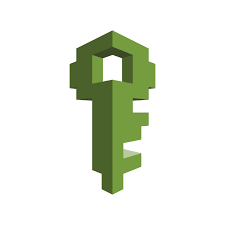</br>

### New vocab: Region

<img src="./image/aws_regions.png" alt="aws_regions" style ="text-align:center;width:500px;float:none" ></br>

#### Regions Defined:
[from AWS documentation](https://aws.amazon.com/about-aws/global-infrastructure/regions_az/):
>AWS has the concept of a Region, which is a physical location around the world where we cluster data centers. We call each group of logical data centers an Availability Zone. Each AWS Region consists of multiple, isolated, and physically separate AZ's within a geographic area...

>Each AZ has independent power, cooling, and physical security and is connected via redundant, ultra-low-latency networks. AWS customers focused on high availability can design their applications to run in multiple AZ's to achieve even greater fault-tolerance. AWS infrastructure Regions meet the highest levels of security, compliance, and data protection.

<img src="./image/aws_regions_facts.png" alt="aws_regions" style ="text-align:center;width:500px;float:none" ></br>

#### Task:
- go to the webiste where I sourced the regions map [https://aws.amazon.com/about-aws/global-infrastructure/](https://aws.amazon.com/about-aws/global-infrastructure/)
- find the two newest AWS regions

__Why do we care?__
- Each time you create a new "service" in AWS, you need to define its region.
- Each region is a separate geographic area and is completely independent
- Each Amazon region is designed to be completely isolated from the other regions & helps achieve the greatest possible fault tolerance and stability
- Communication between regions is across the public Internet and appropriate measures should be taken to protect the data using encryption
- Data transfer between regions is charged at the Internet data transfer rate for both the sending and the receiving instance
- Resources aren’t replicated across regions unless done explicitly

Here are some real factors impacted by your choice of region:
- Latency 
- Cost
- Legal Compliance
- Features 

**For these exercises:** </br>
We are going to use the Northern Virgina region, identified as `us-east-1`

## Getting  files into S3 via the AWS console
(Will start here, will do it through code later)
- have an amazon account
- open s3
- make buckets
- upload files
- set all permissions to open to the public

#### **Tasks**:
- Create bucket named something unique (eg `ae-fis1118-demo`)
- Upload the `wine.csv` and the `carseats.csv` to that bucket
- Make all things public
- Send your url for `wine.csv` to a friend and have them import it using `pandas.read_csv()`

In [1]:
import pandas as pd
pd.read_csv('https://jf-ds-111819.s3.amazonaws.com/wine.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## Amazon Sagemaker
<img src="https://d2908q01vomqb2.cloudfront.net/77de68daecd823babbb58edb1c8e14d7106e83bb/2018/04/24/SageMaker.jpg" alt="sagemaker" style ="text-align:center;width:250px;float:none" ></br>

Amazon Sagemaker includes many services, but we will only be using the [Amazon Sagemaker Notebook Instances](https://docs.aws.amazon.com/sagemaker/latest/dg/nbi.html)

>An Amazon SageMaker notebook instance is a fully managed ML compute instance running the Jupyter Notebook App. Amazon SageMaker manages creating the instance and related resources. Use Jupyter notebooks in your notebook instance to prepare and process data, write code to train models, deploy models to Amazon SageMaker hosting, and test or validate your models.

This means AWS creates _containerized_ environments on [_ec2_](https://aws.amazon.com/ec2/) instances from which you can launch higher powered Jupyter Notebooks.

## Setting up a Jupyter Notebook in Sagemaker
- have an amazon account
- ideally, have s3 buckets created first
- find sagemaker in the offerings
- create a notebook instance (you can only have two on this tier)
- When setting it up, set up user profille permissions to have full access to Sagemaker AND S3 (ignore most other settings)
- Wait for it to be created, will take a few minutes, should say "pending"
- Open Jupyter Lab
- Use git symbol above file directory to git clone a file into the environment
- commit your work the same way you would with any other project
- **TURN OFF THE RESOURCE WHEN DONE**

#### **Tasks**:
- go to Sagemaker within AWS
- create a notebook instance
- set user permissions to have access to Sagemaker & S3, wait for it to be created
- go to github and create your own fork of this directory: https://github.com/learn-co-students/dsc-accessing-data-in-aws/
- go back to your jupyterlab, use the git symbol to clone in your forked version of the the directory

#### Pandas has a nice integration to read from S3 buckets

Replace `ae-fis1118-demo`with the name of the bucket you created.<br>
`data_key` is the full path to the file _within_ your bucket.

In [2]:
!pip install s3fs

     |████████████████████████████████| 71kB 9.1MB/s eta 0:00:011


In [3]:
import pandas as pd
from os import path

bucket='ae-fis1118-demo'
data_key = 'wine.csv'

# reading s3 bucket link
# this ONLY works because our data is public
data_location = path.join('s3://', bucket, data_key)

pd.read_csv(data_location)

FileNotFoundError: The specified bucket does not exist

In [ ]:
import boto3 
# use if private
# released by amazon

# SECRET_KEY = os.environ.get('AWS_ACCESS_KEY')
# read from a file, never explicitly put in key

s3 = boto3.resource('s3')
obj = s3.Object(bucket, data_key)

body = obj.get()['Body'].read()
pd.read_csv(body)